In [37]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from collections import Counter
import random
import seaborn as sns
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter 
import pandas as pd
from scipy import stats, optimize
from fitter import Fitter, get_common_distributions, get_distributions

In [38]:
# Elegimos cajas cuadradas entre [0, R]
def Puntos_circulos(ncentros, ncircle_points, radio, tcaja, pert, pcenter=0.1, disp_cent=1.5):
    #Definimos dos arreglos de ceros en los que guardaremos en uno las coordenadas x y en otro las y de los puntos que aleatorios de nuestros círculos
    """
    ncentros = numero de centros, numero de circulos
    ncircle_points = numero de puntos por circulo
    radio = tamaño del circulo
    tcaja = tamaño de la caja
    pert = porcentaje de la perturbacion, ruido
    pcenter = porcentaje del numero de puntos en el centro
    disp_cent = dispersion en la distribucion de puntos centro
    """
    
    points_center =  int(ncircle_points*pcenter)
    ran_centros = np.random.uniform(low=0.0, high=tcaja, size=((ncentros,2)))
    x_1, y_1 = ran_centros.T[0], ran_centros.T[1] 
    pts = 0
    circulo = []
    label = []
    label_centers = []
    for i in range(ncentros):
        cx = []
        cy = []
        ran_pcircles = np.random.uniform(0, 2*np.pi, ncircle_points)
        for j in ran_pcircles:
            r = radio + random.uniform(-radio*pert,radio*pert) #Pertubación
            c_1 = x_1[i] + r*np.cos(j)
            c_2 = y_1[i] + r*np.sin(j)
            #Como los centros de los círculos pueden estar en la orilla, muchos puntos del cículo deseado se pueden 
            #salir de área a estudiar deseada, por lo que sólo guardamos los que quedan dentro
            if (0 < c_1 < tcaja) & (0 < c_2 < tcaja):
                cx.append(c_1)
                cy.append(c_2)
                label.append(i)
                label_centers.append(-1)
                pts+= 1
        #Agregamos puntos en el centro de los círculos con distribución gaussiana
        x = []
        y = []
        x = np.random.normal(x_1[i], disp_cent, points_center)
        y = np.random.normal(y_1[i], disp_cent, points_center)
        for k in range(points_center):
            if (0 < x[k] < tcaja) & (0 < y[k] < tcaja):
                cx.append(x[k])
                cy.append(y[k])
                label.append(i)
                label_centers.append(i)
                pts+= 1
        # en caso de querer graficar un circulo en particular 
        circulo.append(list(zip(cx, cy)))
    print('total puntos', pts)
    return circulo, label, ran_centros, label_centers

In [39]:
def DD(circulo):
    # Save them all in one array
    all_data = []
    for i, c in enumerate(circulo):
        for _, j in enumerate(c):
            all_data.append(j)
    return all_data


#Creamos una función que nos de las distancias entre dos puntos
def distancia(x1, x2):
    diff_x = (x1[0] - x2[0])**2
    diff_y = (x1[1] - x2[1])**2
    r = np.sqrt(diff_x+diff_y)
    return r


def comp_all_distances(sample):
    dist_random = []
    for i, _ in enumerate(sample):
        g = partial(distancia, sample[i]) #partial() recibe una función A con sus respectivos argumentos y retorna una nueva función B que, al ser llamada, equivale a llamar a la función A con los argumentos provistos.
        d = list(map(g, sample[i+1:]))  # Declaración de una lista
        #La función map() toma una función y una lista y aplica esa función a cada elemento de esa lista, produciendo una nueva lista. 
        dist_random.extend(d)
    return dist_random

def centro_masa(n, r):
    return sum(r)/n

def ring_area(R,r):
    return np.pi*((R**2) -(r**2))

# Distintas perturbaciones

In [7]:
#0 perturbacion
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_per_0, etiqueta_per_0, centros_per_0, label_per_0= Puntos_circulos(150, 40, 20, 150,0, 0.2)
DDcirculo_per_0 = DD(circulo_per_0)
N_per_0 = len(DDcirculo_per_0)

total puntos 6278


In [8]:
#0 perturbacion
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_per_05, etiqueta_per_05, centros= Puntos_circulos(150, 40, 20, 150,0.05, 0.2)
DDcirculo_per_05 = DD(circulo_per_05)
N_per_05 = len(DDcirculo_per_05)

total puntos 6270


In [9]:
#0 perturbacion
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_per_10, etiqueta_per_10, centros= Puntos_circulos(150, 40, 20, 150,0.1, 0.2)
DDcirculo_per_10 = DD(circulo_per_10)
N_per_10 = len(DDcirculo_per_10)

total puntos 6275


In [142]:
#Guardar en txt
#Para extraer las coordenadas de nuestras galaxias y el circulo a la que pertenece cada uno
df_per_0 = pd.DataFrame(DDcirculo_per_0)
df_per_0.insert(2,'label',etiqueta_per_0)
df_per_0.to_csv(r'150per_0.txt', header=None, index=None, sep='	', mode='a')

#Para extraer las coordenadas de nuestras galaxias y el circulo a la que pertenece cada uno
df_per_05 = pd.DataFrame(DDcirculo_per_05)
df_per_05.insert(2,'label',etiqueta_per_05)
df_per_05.to_csv(r'150per_05.txt', header=None, index=None, sep='	', mode='a')

#Para extraer las coordenadas de nuestras galaxias y el circulo a la que pertenece cada uno
df_per_10 = pd.DataFrame(DDcirculo_per_10)
df_per_10.insert(2,'label',etiqueta_per_10)
print(df_per_10)
df_per_10.to_csv(r'150per_10.txt', header=None, index=None, sep='	', mode='a')

               0          1  label
0     146.627175  54.626984      0
1     117.241033  73.340036      0
2     139.660032  93.611284      0
3     133.476318  89.463450      0
4     136.300398  53.371632      0
...          ...        ...    ...
6267   69.305177  85.220262    149
6268   69.015298  89.330382    149
6269   69.336195  89.346405    149
6270   66.226686  87.049637    149
6271   68.146223  86.995705    149

[6272 rows x 3 columns]


In [10]:
df_per_0 = pd.read_csv('150per_0.txt', header = None)
df_per_05 = pd.read_csv('150per_05.txt', header = None)
df_per_10 = pd.read_csv('150per_10.txt', header = None)

## Calculo de pares DD

In [143]:
distance_dd_per_0 = comp_all_distances(DDcirculo_per_0)

ddata_per_0 = [round(r, 0) for r in  distance_dd_per_0]
dcount_per_0 = Counter(ddata_per_0)
sorted_DD_per_0 = sorted(dcount_per_0.items())

DD_per_0= []
for i in range(149):
    DD_per_0.append(dcount_per_0[i]/((N_per_0*(N_per_0-1))/2))

In [144]:
distance_dd_per_05 = comp_all_distances(DDcirculo_per_05)

ddata_per_05 = [round(r, 0) for r in  distance_dd_per_05]
dcount_per_05 = Counter(ddata_per_05)
sorted_DD_per_05 = sorted(dcount_per_05.items())

DD_per_05= []
for i in range(149):
    DD_per_05.append(dcount_per_05[i]/((N_per_05*(N_per_05-1))/2))

In [145]:
distance_dd_per_10 = comp_all_distances(DDcirculo_per_10)

ddata_per_10 = [round(r, 0) for r in  distance_dd_per_10]
dcount_per_10 = Counter(ddata_per_10)
sorted_DD_per_10 = sorted(dcount_per_10.items())

DD_per_10= []
for i in range(149):
    DD_per_10.append(dcount_per_10[i]/((N_per_10*(N_per_10-1))/2))

## Nuevo rr  geométrica
$$\hat{RR}_{cuadrado}(r)=\frac{2\pi}{a^2}r-\frac{8}{a^3}r^2+\frac{2}{a^4}r^3$$

In [146]:
def RRcuadrado(r,a):
    RR_cuadrado = []
    for t in r:
        s = (2*np.pi*t/(a**2)) - ((8*(t**2))/(a**3)) + ((2*(t**3))/(a**4))
        RR_cuadrado.append(s)
    return RR_cuadrado

In [147]:
r_square = []
for t in range(1,150):
    r_square.append(t) 

In [148]:
RR_square = RRcuadrado(r_square,150)

## Función de correlación
- Peebles-Hauser: Propuesto en 1974, este compara el exceso de pares de puntos en un rango de distancia entre el campo objetivo y el campo de comparación. Se define como:
$$\xi_{PH} (r) = \frac{DD(r)}{RR(r)}- 1$$

In [149]:
ξ_PH_square_per_0 = []
for i in range(149):
    ξ_PH_square_per_0.append(((DD_per_0[i]/RR_square[i]) -1))

In [150]:
ξ_PH_square_per_05 = []
for i in range(149):
    ξ_PH_square_per_05.append(((DD_per_05[i]/RR_square[i]) -1))

In [151]:
ξ_PH_square_per_10 = []
for i in range(149):
    ξ_PH_square_per_10.append(((DD_per_10[i]/RR_square[i]) -1))

In [152]:
#Guardar en txt
#ξ 0%
df_2pcf_per_0 = pd.DataFrame(ξ_PH_square_per_0)
df_2pcf_per_0.to_csv(r'150_2pcf_per_0.txt', header=None, index=None, sep='	', mode='a')
#ξ 5%
df_2pcf_per_05 = pd.DataFrame(ξ_PH_square_per_05)
df_2pcf_per_05.to_csv(r'150_2pcf_per_05.txt', header=None, index=None, sep='	', mode='a')
#ξ 10%
df_2pcf_per_10 = pd.DataFrame(ξ_PH_square_per_10)
df_2pcf_per_10.to_csv(r'150_2pcf_per_10.txt', header=None, index=None, sep='	', mode='a')

In [132]:
ξ_PH_square_per_0 = pd.read_csv('2pcf_per_0.txt', header = None)
ξ_PH_square_per_05 = pd.read_csv('2pcf_per_05.txt', header = None)
ξ_PH_square_per_10 = pd.read_csv('2pcf_per_10.txt', header = None)

# Graficar

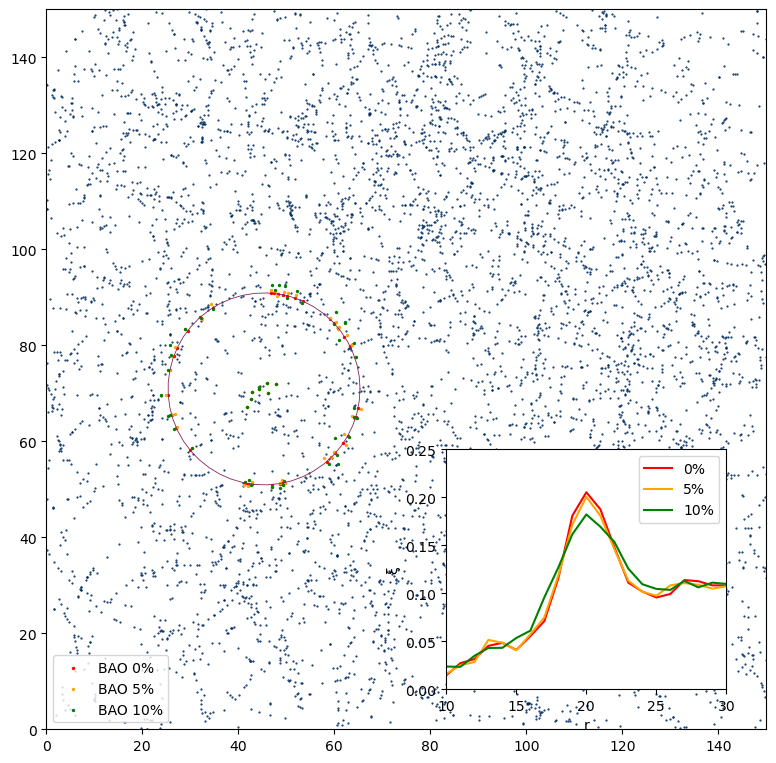

In [157]:
fig_1 = plt.figure(figsize=(8,8), dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9]) #[left, bottom, width, height]
axes_1.set_xlim(0, 150) #This is how you add labels to the axes
axes_1.set_ylim(0, 150)
#graficar todos
for cir in circulo_per_0: 
    axes_1.scatter(*zip(*cir), color='#002E63', s=.3)
#graficar un solo circulos
axes_1.scatter(*zip(*circulo_per_0[4]), color='r', s=2, label='BAO 0%')
axes_1.scatter(*zip(*circulo_per_05[4]), color='orange', s=2, label='BAO 5%')
axes_1.scatter(*zip(*circulo_per_10[4]), color='g', s=2, label='BAO 10%')
axes_1.legend(loc=0) #Legend
#circulo
r = 20
t = np.linspace(0, 2*np.pi)
x = centros_per_0[4][0] + (r * np.cos(t))
y = centros_per_0[4][1] + (r * np.sin(t))
axes_1.plot(x,y, color='#872657', linewidth=0.6)

#subplot1
axes_2 = fig_1.add_axes([0.6,0.15,0.35,0.3])
axes_2.set_xlabel('r') #This is how you add labels to the axes
axes_2.set_ylabel('ξ')
axes_2.set_xlim(10,30)
axes_2.set_ylim(0,0.25)
#axes_2.plot(ξ_PH_square, label='Original', color='#872657', alpha=0.5)
axes_2.plot(ξ_PH_square_per_0, label='0%', color='r')
axes_2.plot(ξ_PH_square_per_05, label='5%', color='orange')
axes_2.plot(ξ_PH_square_per_10, label='10%', color='g')
axes_2.legend(loc=0) #Legend

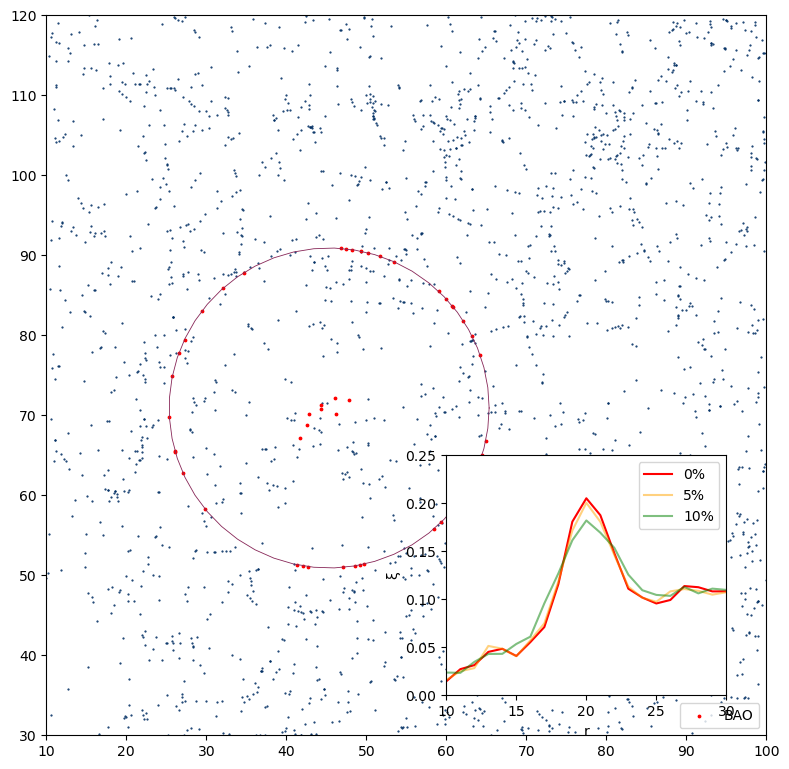

In [158]:
fig_1 = plt.figure(figsize=(8,8), dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9]) #[left, bottom, width, height]
axes_1.set_xlim(10, 100) #This is how you add labels to the axes
axes_1.set_ylim(30, 120)
#graficar todos
for cir in circulo_per_0: 
    axes_1.scatter(*zip(*cir), color='#002E63', s=.3)
#graficar un solo circulos
axes_1.scatter(*zip(*circulo_per_0[4]), color='r', s=3, label='BAO')
axes_1.legend(loc=0) #Legend
#circulo
r = 20
t = np.linspace(0, 2*np.pi)
x = centros_per_0[4][0] + (r * np.cos(t))
y = centros_per_0[4][1] + (r * np.sin(t))
axes_1.plot(x,y, color='#872657', linewidth=0.6)

#subplot1
axes_2 = fig_1.add_axes([0.6,0.15,0.35,0.3])
axes_2.set_xlabel('r') #This is how you add labels to the axes
axes_2.set_ylabel('ξ')
axes_2.set_xlim(10,30)
axes_2.set_ylim(0,0.25)
#axes_2.plot(ξ_PH_square, label='Original', color='#872657', alpha=0.5)
axes_2.plot(ξ_PH_square_per_0, label='0%', color='r')
axes_2.plot(ξ_PH_square_per_05, label='5%', color='orange', alpha=0.5)
axes_2.plot(ξ_PH_square_per_10, label='10%', color='g', alpha=0.5)
axes_2.legend(loc=0) #Legend

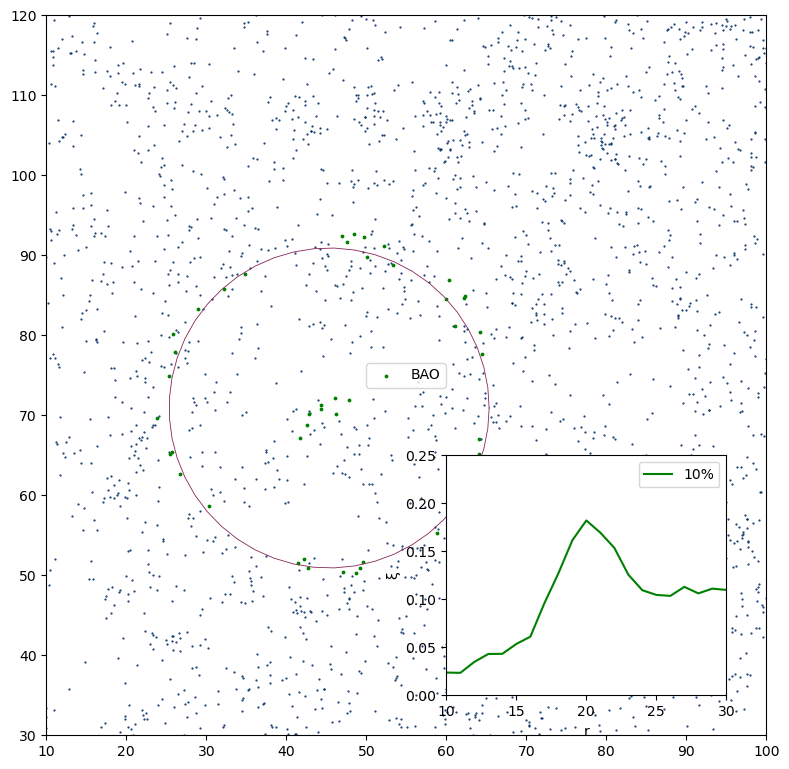

In [161]:
fig_1 = plt.figure(figsize=(8,8), dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9]) #[left, bottom, width, height]
axes_1.set_xlim(10, 100) #This is how you add labels to the axes
axes_1.set_ylim(30, 120)
#graficar todos
for cir in circulo_per_10: 
    axes_1.scatter(*zip(*cir), color='#002E63', s=.3)
#graficar un solo circulos
axes_1.scatter(*zip(*circulo_per_10[4]), color='g', s=3, label='BAO')
axes_1.legend(loc=0) #Legend
#circulo
r = 20
t = np.linspace(0, 2*np.pi)
x = centros_per_0[4][0] + (r * np.cos(t))
y = centros_per_0[4][1] + (r * np.sin(t))
axes_1.plot(x,y, color='#872657', linewidth=0.6)

#subplot1
axes_2 = fig_1.add_axes([0.6,0.15,0.35,0.3])
axes_2.set_xlabel('r') #This is how you add labels to the axes
axes_2.set_ylabel('ξ')
axes_2.set_xlim(10,30)
axes_2.set_ylim(0,0.25)
#axes_2.plot(ξ_PH_square, label='Original', color='#872657', alpha=0.5)
axes_2.plot(ξ_PH_square_per_10, label='10%', color='g')
axes_2.legend(loc=0) #Legend

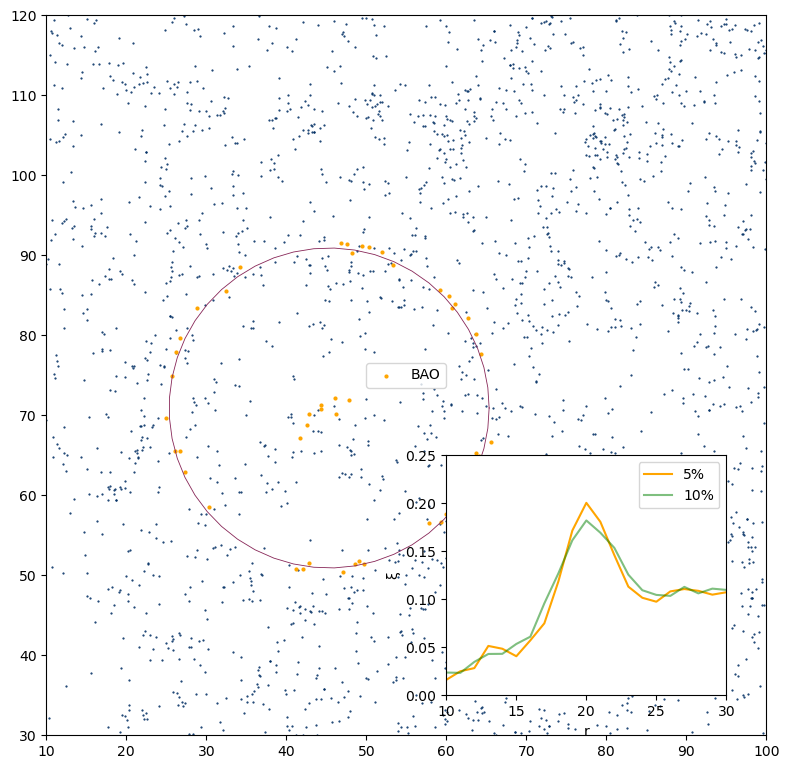

In [163]:
fig_1 = plt.figure(figsize=(8,8), dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9]) #[left, bottom, width, height]
axes_1.set_xlim(10, 100) #This is how you add labels to the axes
axes_1.set_ylim(30, 120)
#graficar todos
for cir in circulo_per_05: 
    axes_1.scatter(*zip(*cir), color='#002E63', s=.3)
#graficar un solo circulos
axes_1.scatter(*zip(*circulo_per_05[4]), color='orange', s=4, label='BAO')
axes_1.legend(loc=0) #Legend
#circulo
r = 20
t = np.linspace(0, 2*np.pi)
x = centros_per_0[4][0] + (r * np.cos(t))
y = centros_per_0[4][1] + (r * np.sin(t))
axes_1.plot(x,y, color='#872657', linewidth=0.6)

#subplot1
axes_2 = fig_1.add_axes([0.6,0.15,0.35,0.3])
axes_2.set_xlabel('r') #This is how you add labels to the axes
axes_2.set_ylabel('ξ')
axes_2.set_xlim(10,30)
axes_2.set_ylim(0,0.25)
#axes_2.plot(ξ_PH_square, label='Original', color='#872657', alpha=0.5)
axes_2.plot(ξ_PH_square_per_05, label='5%', color='orange')
axes_2.plot(ξ_PH_square_per_10, label='10%', color='g', alpha=0.5)
axes_2.legend(loc=0) #Legend

In [ ]:
1) fig con 0\% ruido
2) fig con 10\% ruido 
-- compararlas 
3) la fig que tiene 10 \%
usar DBSCAN para encontrar los centros, y hacer los anillos i.e. si el radio caracteristico es 20, usar entre 18-19 de radio, 19-20, 20-21 de radios
y ver en cual de esos anillos cae mas la densidad 

## Dbscan

In [40]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [189]:
#0 perturbacion
BAOs = 30
puntos = 20
radio = 15
pert = 0.1
porcen = 0.3
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_per_0, etiqueta_per_0, centros_per_0, label_per_0= Puntos_circulos(BAOs, puntos, radio, 150,pert, porcen, 1)
DDcirculo_per_0 = DD(circulo_per_0)
N_per_0 = len(DDcirculo_per_0)

total puntos 687


In [190]:
#Importampos los datos
datos = np.zeros((len(DDcirculo_per_0),2))
for i in range(len(DDcirculo_per_0)):
        datos[i,0] = DDcirculo_per_0[i][0]
        datos[i,1] = DDcirculo_per_0[i][1]

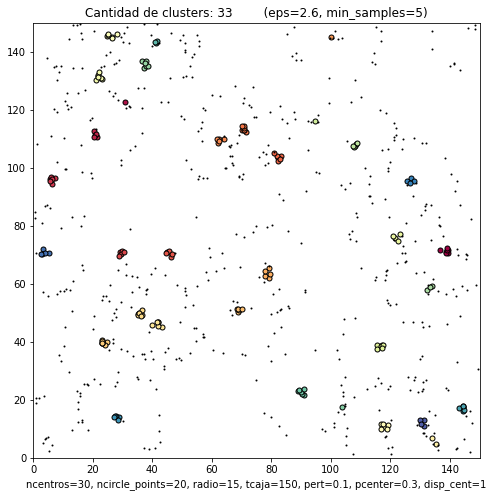

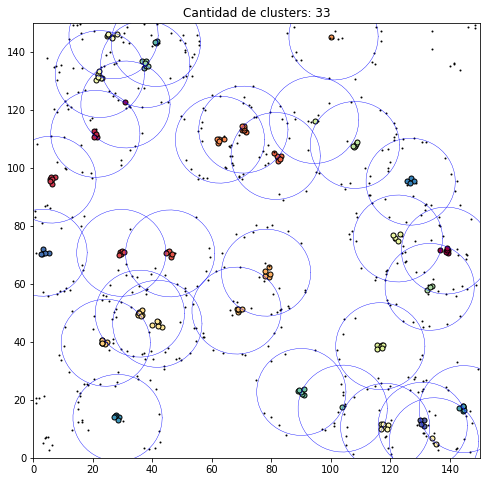

In [191]:
ep = 2.6
mini = 5
# DBSCAN
db = DBSCAN(eps=ep, min_samples=mini).fit(datos) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

    xy = datos[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=1)

plt.title(f'Cantidad de clusters: %d        (eps={ep}, min_samples={mini})' % n_clusters_ )
plt.xlabel(f'ncentros={BAOs}, ncircle_points={puntos}, radio={radio}, tcaja=150, pert={pert}, pcenter={porcen}, disp_cent=1')
plt.xlim(0,150)
plt.ylim(0,150)
plt.show() 

# Para obtener los indices correpondientes de los puntos de cada cluster
mydict = {i: np.where(labels == i)[0] for i in range(n_clusters_)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
list_value = []
for key, value in mydict.items():
    temp = [key,value]
    list_value.append(temp)
    dictlist.append(value)
    
cluster_data = []
for j in mydict.values():
    cluster_data.append(datos[j])
    
centros_clusters = np.zeros((len(cluster_data),2))
for i in range(len(cluster_data)):
        centros_clusters[i,0] = centro_masa(len(cluster_data[i][:,0]), cluster_data[i][:,0])
        centros_clusters[i,1] = centro_masa(len(cluster_data[i][:,1]), cluster_data[i][:,1])
        
#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

    xy = datos[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=1)

plt.title('Cantidad de clusters: %d' % n_clusters_)

t = np.linspace(0, 2*np.pi)
for i in range(len(centros_clusters)):
    x = centros_clusters[i,0] + (radio * np.cos(t))
    y = centros_clusters[i,1] + (radio * np.sin(t))
    plt.plot(x,y, color='b', lw=0.4)
plt.xlim(0,150)
plt.ylim(0,150)
plt.show()

In [192]:
import numpy as np

def calcular_agrupamientos_correctos(etiquetas_originales, etiquetas_detectadas):
    agrupamientos_correctos = 0
    indices_correctos = []
    indices_erroneos = []

    etiquetas_originales = np.array(etiquetas_originales)
    etiquetas_detectadas = np.array(etiquetas_detectadas)

    for etiqueta_detectada in set(etiquetas_detectadas):
        if etiqueta_detectada == -1:
            continue
        
        indices_etiqueta_detectada = np.where(etiquetas_detectadas == etiqueta_detectada)[0]
        etiquetas_originales_agrupamiento = etiquetas_originales[indices_etiqueta_detectada]
        
        if etiqueta_detectada != -1 and np.count_nonzero(etiquetas_originales_agrupamiento != -1) >= 2:
            agrupamientos_correctos += 1
            indices_correctos.extend(indices_etiqueta_detectada)
        else:
            indices_erroneos.extend(indices_etiqueta_detectada)
    
    return agrupamientos_correctos, indices_correctos, indices_erroneos

In [193]:
correctos, bien, mal = calcular_agrupamientos_correctos(label_per_0, labels)

In [194]:
correctos

27

El centro de masas de un sistema discreto o continuo es el punto geométrico que dinámicamente se comporta como si en él estuviera aplicada la resultante de las fuerzas externas al sistema

Para un sistema de masas discreto, formado por un conjunto de masas puntuales, el centro de masas se puede calcular como:

$$ \mathbf {r} _{\text{cm}}={\frac {\sum _{i}m_{i}\mathbf {r} _{i}}{\sum _{i}m_{i}}}={\frac {1}{M}}\sum _{i}m_{i}\mathbf {r} _{i}$$

$M$, masa total del sistema de partículas.
$m_{i}$, masa de la partícula i-ésima.
${r}_{i}$, vector de posición de la masa i-ésima respecto al sistema de referencia supuesto.

En este caso suponemos que $m_i=1$

A continuación se tomará el centro de masa de cada cluster y se dibujaran circunferencias con radio 15 (obtenido con la función de correlación) y como centro el centro de masa.

La distancia entre 2 puntos $(x_c,y_c)$ and $(x_p,y_p)$ está dada por el teorema de Pitágoras como
$$d=\sqrt{(x_p−x_c)^2+(y_p−y_c)^2}$$
El punto $(x_p,y_p)$ está dentro de la circunferencia si $d<r$, en la circunferencia si $d=r$, y afuera de la circunferencia si $d>r$.

El area de un anillo está dada por:
    $$Area_{anillo} = \pi (R^2 - r^2)$$

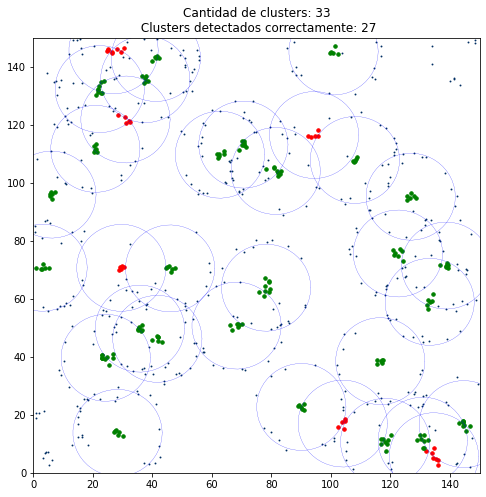

In [195]:
#Plot
plt.figure(figsize=(8,8))
plt.title(f'Cantidad de clusters: {n_clusters_}\n Clusters detectados correctamente: {correctos}')

#graficar todos
for cir in circulo_per_0: 
    plt.scatter(*zip(*cir), color='#002E63', s=.8)

t = np.linspace(0, 2*np.pi)
for i in range(len(centros_clusters)):
    x = centros_clusters[i,0] + (radio * np.cos(t))
    y = centros_clusters[i,1] + (radio * np.sin(t))
    plt.plot(x,y, color='b', lw=0.2)
plt.xlim(0,150)
plt.ylim(0,150)

for i in mal:
    plt.scatter(datos[i,0], datos[i,1], color='r', s=12)
    
for j in bien:
    plt.scatter(datos[j,0], datos[j,1], color='g', s=12)
plt.show()

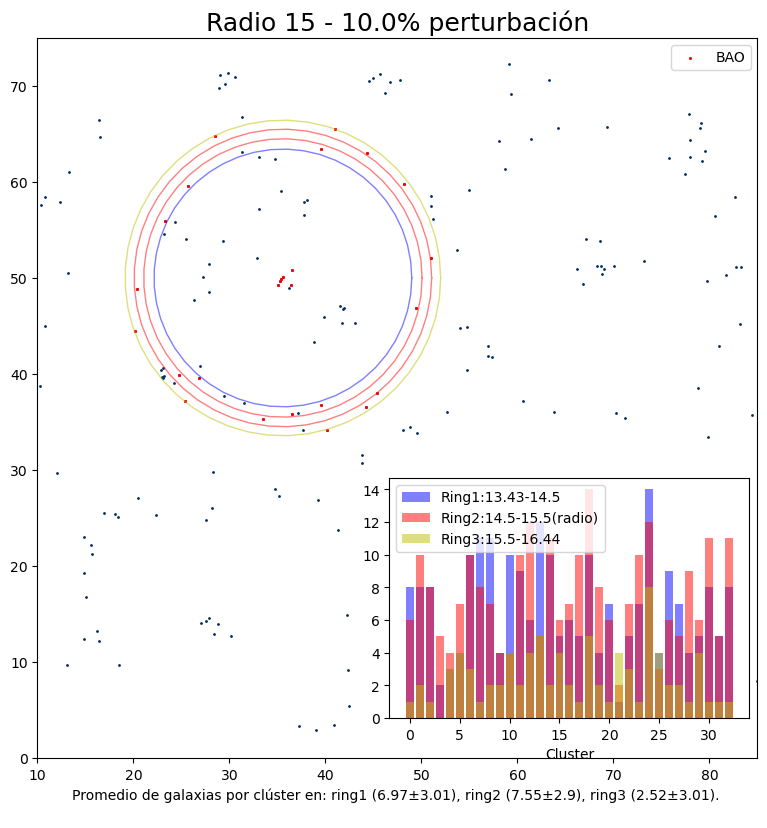

In [196]:
R = 15.5
r = 14.5
liminf = np.sqrt((r**2)-(ring_area(R,r)/np.pi))
limsup = np.sqrt((R**2)+(ring_area(R,r)/np.pi))
#A continuación se aprecia que todas las areas son iguales
#ring_area(R,r)
#ring_area(r,liminf)
#ring_area(limsup,R)

ring1 = np.zeros(len(centros_clusters))
ring2 = np.zeros(len(centros_clusters))
ring3 = np.zeros(len(centros_clusters))
ring1_points = []
ring2_points = []
ring3_points = []
for i in range(len(centros_clusters)):
    for  j in range(len(datos)):
        if liminf < distancia(centros_clusters[i], datos[j]) < r:
            ring1[i] +=1
            ring1_points.append(datos[j])
        elif 14 <= distancia(centros_clusters[i], datos[j]) <= R:
            ring2[i] +=1
            ring2_points.append(datos[j])
        elif 16 < distancia(centros_clusters[i], datos[j]) < limsup:
            ring3[i] +=1
            ring3_points.append(datos[j])

clusters = []
for i in range(len(centros_clusters)):
    clusters.append(i)
    
#plt.bar(clusters,ring1,label=f'{round(liminf,2)}-{r}',alpha=0.5, color='b')
#plt.bar(clusters,ring2,label=f'{r}-{R}(radio)',alpha=0.5, color='r')
#plt.bar(clusters,ring3,label=f'{R}-{round(limsup,2)}',alpha=0.5, color='y')
#plt.title(f'Radio {radio} - {pert*100}% perturbación', fontsize=18)
#plt.legend(loc=0)
#plt.show()    

fig_1 = plt.figure(figsize=(8,8), dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9]) #[left, bottom, width, height]
axes_1.set_title(f'Radio {radio} - {pert*100}% perturbación', fontsize=18)
axes_1.set_xlabel(f'Promedio de galaxias por clúster en: ring1 ({round(np.mean(ring1),2)}±{round(np.std(ring1),2)}), ring2 ({round(np.mean(ring2),2)}±{round(np.std(ring2),2)}), ring3 ({round(np.mean(ring3),2)}±{round(np.std(ring1),2)}). \n')
#axes_1.set_xlim(0, 150) #This is how you add labels to the axes
#axes_1.set_ylim(0, 150)
axes_1.set_xlim(10, 85) #This is how you add labels to the axes
axes_1.set_ylim(0, 75)
#graficar todos
for cir in circulo_per_0: 
    axes_1.scatter(*zip(*cir), color='#002E63', s=1)
#graficar un solo circulos
axes_1.scatter(*zip(*circulo_per_0[9]), color='r', s=1.5, label='BAO')
axes_1.legend(loc=0) #Legend
#circulo
centro = centros_per_0[9]
t = np.linspace(0, 2*np.pi)

x = centro[0] + (r * np.cos(t))
y = centro[1] + (r * np.sin(t))
axes_1.plot(x,y, color='r', linewidth=1, alpha=0.5)

x = centro[0] + (R * np.cos(t))
y = centro[1] + (R * np.sin(t))
axes_1.plot(x,y, color='r', linewidth=1, alpha=0.5)

x = centro[0] + (limsup * np.cos(t))
y = centro[1] + (limsup * np.sin(t))
axes_1.plot(x,y, color='y', linewidth=1, alpha=0.5)

x = centro[0] + (liminf * np.cos(t))
y = centro[1] + (liminf * np.sin(t))
axes_1.plot(x,y, color='b', linewidth=1, alpha=0.5)

#subplot1
axes_2 = fig_1.add_axes([0.54,0.15,0.45,0.3])
axes_2.bar(clusters,ring1,label=f'Ring1:{round(liminf,2)}-{r}',alpha=0.5, color='b')
axes_2.bar(clusters,ring2,label=f'Ring2:{r}-{R}(radio)',alpha=0.5, color='r')
axes_2.bar(clusters,ring3,label=f'Ring3:{R}-{round(limsup,2)}',alpha=0.5, color='y')
axes_2.set_xlabel('Cluster')
axes_2.legend(loc=0)

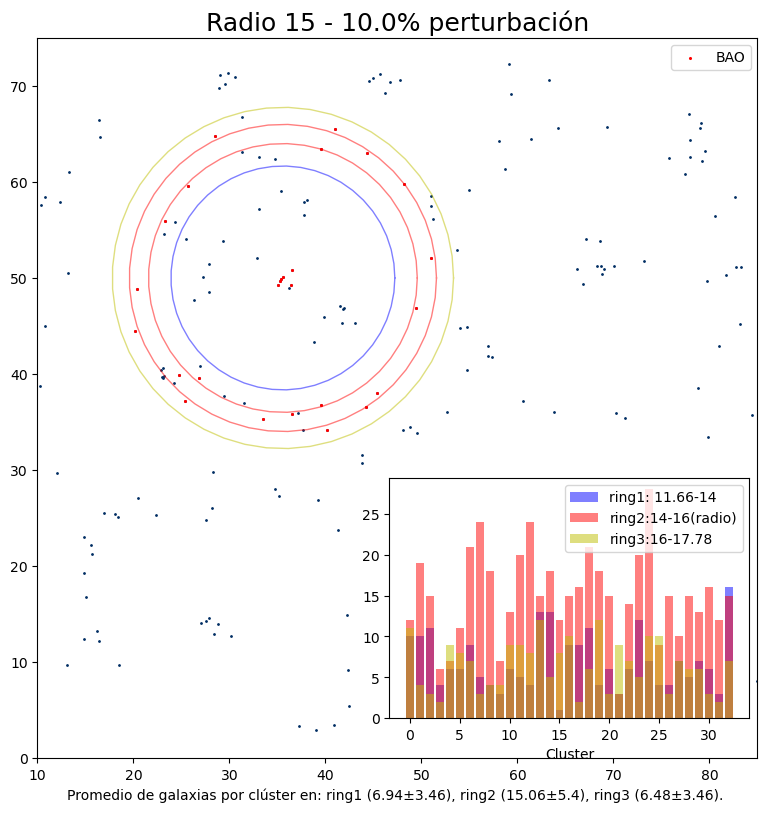

In [197]:
R = 16
r = 14
liminf = np.sqrt((r**2)-(ring_area(R,r)/np.pi))
limsup = np.sqrt((R**2)+(ring_area(R,r)/np.pi))
#A continuación se aprecia que todas las areas son iguales
#ring_area(R,r)
#ring_area(r,liminf)
#ring_area(limsup,R)

ring1 = np.zeros(len(centros_clusters))
ring2 = np.zeros(len(centros_clusters))
ring3 = np.zeros(len(centros_clusters))
ring1_points = []
ring2_points = []
ring3_points = []
for i in range(len(centros_clusters)):
    for  j in range(len(datos)):
        if liminf < distancia(centros_clusters[i], datos[j]) < r:
            ring1[i] +=1
            ring1_points.append(datos[j])
        elif 14 <= distancia(centros_clusters[i], datos[j]) <= R:
            ring2[i] +=1
            ring2_points.append(datos[j])
        elif 16 < distancia(centros_clusters[i], datos[j]) < limsup:
            ring3[i] +=1
            ring3_points.append(datos[j])

clusters = []
for i in range(len(centros_clusters)):
    clusters.append(i)
    
#plt.bar(clusters,ring1,label=f'{round(liminf,2)}-{r}',alpha=0.5, color='b')
#plt.bar(clusters,ring2,label=f'{r}-{R}(radio)',alpha=0.5, color='r')
#plt.bar(clusters,ring3,label=f'{R}-{round(limsup,2)}',alpha=0.5, color='y')
#plt.title(f'Radio {radio} - {pert*100}% perturbación', fontsize=18)
#plt.legend(loc=0)
#plt.show()    

fig_1 = plt.figure(figsize=(8,8), dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9]) #[left, bottom, width, height]
axes_1.set_title(f'Radio {radio} - {pert*100}% perturbación', fontsize=18)
axes_1.set_xlabel(f'Promedio de galaxias por clúster en: ring1 ({round(np.mean(ring1),2)}±{round(np.std(ring1),2)}), ring2 ({round(np.mean(ring2),2)}±{round(np.std(ring2),2)}), ring3 ({round(np.mean(ring3),2)}±{round(np.std(ring1),2)}). \n')
#axes_1.set_xlim(0, 150) #This is how you add labels to the axes
#axes_1.set_ylim(0, 150)
axes_1.set_xlim(10, 85) #This is how you add labels to the axes
axes_1.set_ylim(0, 75)
#graficar todos
for cir in circulo_per_0: 
    axes_1.scatter(*zip(*cir), color='#002E63', s=1)
#graficar un solo circulos
axes_1.scatter(*zip(*circulo_per_0[9]), color='r', s=1.5, label='BAO')
axes_1.legend(loc=0) #Legend
#circulo
centro = centros_per_0[9]
t = np.linspace(0, 2*np.pi)

x = centro[0] + (r * np.cos(t))
y = centro[1] + (r * np.sin(t))
axes_1.plot(x,y, color='r', linewidth=1, alpha=0.5)

x = centro[0] + (R * np.cos(t))
y = centro[1] + (R * np.sin(t))
axes_1.plot(x,y, color='r', linewidth=1, alpha=0.5)

x = centro[0] + (limsup * np.cos(t))
y = centro[1] + (limsup * np.sin(t))
axes_1.plot(x,y, color='y', linewidth=1, alpha=0.5)

x = centro[0] + (liminf * np.cos(t))
y = centro[1] + (liminf * np.sin(t))
axes_1.plot(x,y, color='b', linewidth=1, alpha=0.5)

#subplot1
axes_2 = fig_1.add_axes([0.54,0.15,0.45,0.3])
axes_2.bar(clusters,ring1,label=f'ring1: {round(liminf,2)}-{r}',alpha=0.5, color='b')
axes_2.bar(clusters,ring2,label=f'ring2:{r}-{R}(radio)',alpha=0.5, color='r')
axes_2.bar(clusters,ring3,label=f'ring3:{R}-{round(limsup,2)}',alpha=0.5, color='y')
axes_2.set_xlabel('Cluster')
axes_2.legend(loc=0)

# Fin